In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
import mplfinance as mpf

In [4]:
import pandas_datareader.data as web

In [5]:
stock_info = web.DataReader('TSLA', 'yahoo', start='2020-01-01')

In [6]:
stock_info

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001
...,...,...,...,...,...,...
2021-04-29,702.250000,668.500000,699.510010,677.000000,28845400.0,677.000000
2021-04-30,715.469971,666.140015,667.590027,709.440002,40686400.0,709.440002
2021-05-03,706.000000,680.500000,703.799988,684.900024,27043100.0,684.900024


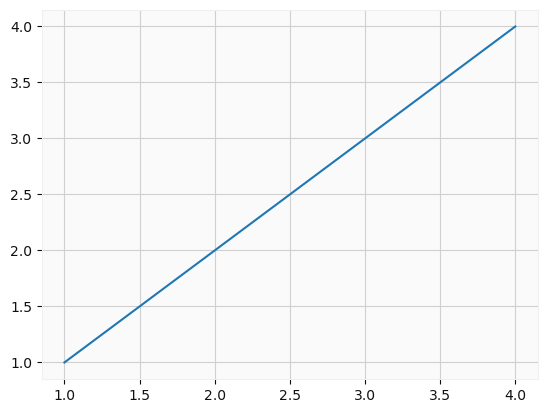

In [9]:
plt.figure()
plt.plot([1,2,3,4], [1,2,3,4])
plt.show()

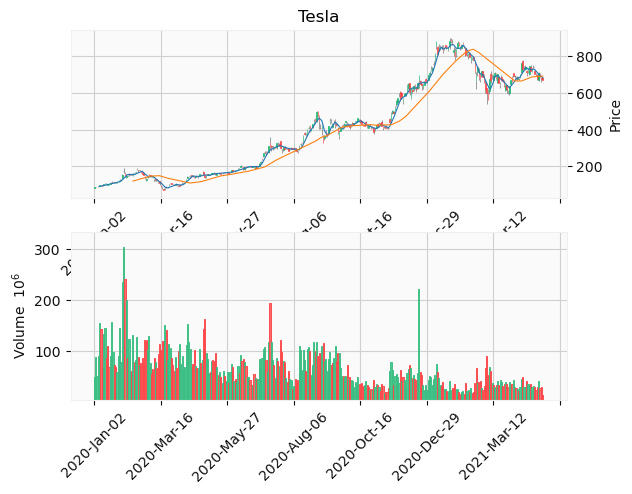

In [8]:
fig = mpf.figure(style='yahoo')
ax = fig.add_subplot(2,1,1)
av = fig.add_subplot(2,1,2,sharex = ax)
mpf.plot(stock_info, ax=ax, type='candle', volume=av, mav=(5,30), axtitle='Tesla')

mpf.show()

In [10]:
stock_info['MA5'] = stock_info['Close'].rolling(window=5).mean()
stock_info['MA30'] = stock_info['Close'].rolling(window=30).mean()

stock_info = stock_info.dropna()

In [9]:
diff1 = stock_info['MA5'] < stock_info['MA30']
diff2 = stock_info['MA5'] >= stock_info['MA30']

In [10]:


gc = stock_info[-(diff1 | diff2.shift(1))].index
dc = stock_info[(diff1 & diff2.shift(2))].index



In [11]:
gc

DatetimeIndex(['2020-02-13', '2020-04-13', '2020-08-13', '2020-09-15',
               '2020-10-01', '2020-11-09', '2020-11-18', '2021-04-06'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
dc

DatetimeIndex(['2020-03-03', '2020-03-04', '2020-08-11', '2020-08-12',
               '2020-09-14', '2020-09-25', '2020-09-28', '2020-10-23',
               '2020-10-26', '2020-11-11', '2021-02-16', '2021-02-17',
               '2021-05-04', '2021-05-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [13]:


gc_date = pd.Series(1, index=gc)

print(gc_date)

dc_date = pd.Series(0, index=dc)

print(dc_date)

dates = gc_date.append(dc_date).sort_index()

Date
2020-02-13    1
2020-04-13    1
2020-08-13    1
2020-09-15    1
2020-10-01    1
2020-11-09    1
2020-11-18    1
2021-04-06    1
dtype: int64
Date
2020-03-03    0
2020-03-04    0
2020-08-11    0
2020-08-12    0
2020-09-14    0
2020-09-25    0
2020-09-28    0
2020-10-23    0
2020-10-26    0
2020-11-11    0
2021-02-16    0
2021-02-17    0
2021-05-04    0
2021-05-05    0
dtype: int64


In [14]:
dates

Date
2020-02-13    1
2020-03-03    0
2020-03-04    0
2020-04-13    1
2020-08-11    0
2020-08-12    0
2020-08-13    1
2020-09-14    0
2020-09-15    1
2020-09-25    0
2020-09-28    0
2020-10-01    1
2020-10-23    0
2020-10-26    0
2020-11-09    1
2020-11-11    0
2020-11-18    1
2021-02-16    0
2021-02-17    0
2021-04-06    1
2021-05-04    0
2021-05-05    0
dtype: int64

In [15]:
principal = 100000
hold = 0

%pdb

for i in dates.index:
    p = stock_info['Open'][i]
    print(p)
    if dates[i] == 1:
        hold += principal // p
   
        if principal >= p:
            principal = principal % p
        

        
    elif dates[i] == 0:
        principal += p*hold
        hold = 0
        
    print('-------')    
    print('Principal: ', principal)
    print('Hold: ', hold)
    print('-------')  
    
principal + stock_info['Open'][len(stock_info)-1] * hold
    

Automatic pdb calling has been turned ON
148.3679962158203
-------
Principal:  148.3385467529297
Hold:  673.0
-------
161.0
-------
Principal:  108501.33854675293
Hold:  0
-------
152.79200744628906
-------
Principal:  108501.33854675293
Hold:  0
-------
118.03199768066406
-------
Principal:  29.93267822265625
Hold:  919.0
-------
279.20001220703125
-------
Principal:  256614.74389648438
Hold:  0
-------
294.0
-------
Principal:  256614.74389648438
Hold:  0
-------
322.20001220703125
-------
Principal:  143.5341796875
Hold:  796.0
-------
380.95001220703125
-------
Principal:  303379.7438964844
Hold:  0
-------
436.55999755859375
-------
Principal:  407.1055908203125
Hold:  694.0
-------
393.4700012207031
-------
Principal:  273475.2864379883
Hold:  0
-------
424.6199951171875
-------
Principal:  273475.2864379883
Hold:  0
-------
440.760009765625
-------
Principal:  204.08038330078125
Hold:  620.0
-------
421.8399963378906
-------
Principal:  261744.87811279297
Hold:  0
-------
411.63

445005.791595459